In [1]:
#import pandas library
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
#creating an empty dataframe for our dataset
df = pd.DataFrame()

Using TensorFlow backend.


In [2]:
# Read Heart_s.csv dataset from local disk and copy it to df Dataframe
#df=pd.read_csv('./only_labels_simple.csv')
df=pd.read_csv('./dataset/latestdata/latestdataBalancedShuffled_c.csv')
#df2=pd.read_csv('./only_labels_simple -test.csv',encoding="ISO-8859–1")


In [3]:
df.groupby('outcome').size()


outcome
died         6010
recovered    6010
dtype: int64

In [4]:

df=df.replace('died',0)
df=df.replace('recovered',1)
df=df.replace('stable',1)
df=df.replace('severe',0)
df['chronic_disease'].fillna(0,inplace = True)
df1=df
df2=df

In [5]:
#check df Data set to make sure data is correct
df.head()

,age,gender,sex,city,province,country,lives_in_Wuhan,travel_history_location,additional_information,chronic_disease_binary,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
0,65.0,0,0,Seattle,Washington,United States,NaN,NaN,family member of a confirmed case of COVID-19,0,...,0,0,0,0,0,0,0,0,0,1
1,54.0,0,0,Taguig,Metro Manila,Philippines,NaN,NaN,C871964,0,...,0,0,0,0,0,0,0,0,0,1
2,40.0,0,0,Pasay,Metro Manila,Philippines,NaN,NaN,C430124,0,...,0,0,0,0,0,0,0,0,0,1
3,28.0,0,0,Muntinlupa,Metro Manila,Philippines,NaN,NaN,C741550,0,...,0,0,0,0,0,0,0,0,0,1
4,30.0,0,0,Cainta,Rizal,Philippines,NaN,NaN,C535553,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.columns

Index(['age', 'gender', 'sex', 'city', 'province', 'country', 'lives_in_Wuhan',
       'travel_history_location', 'additional_information',
       'chronic_disease_binary', 'chronic_disease',
       'chronic_disease_Hypertension', 'chronic_disease_Diabetes',
       'chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma',
       'chronic_disease_cardiac', 'chronic_disease_prostate',
       'chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV',
       'chronic_disease_cereberal', 'chronic_disease_Parkinson',
       'chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain', 'chills',
       'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea', 'emesis',
       'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension

In [7]:
#creating a list of numerical feature names

num_feat=['age', 'sex', 'anorexia', 'chronic_disease_binary','chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']


In [8]:
df.corr()

,age,gender,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,...,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia,outcome
age,1.000000,0.141272,0.049554,0.193957,0.167183,0.116855,0.080140,0.071872,0.061443,0.018021,...,-0.002883,-0.001289,-0.004235,-0.002233,-0.005624,-0.002812,-0.002233,-0.001823,-0.001823,1.264008e-01
gender,0.141272,1.000000,0.389903,0.097253,0.077885,0.063958,0.038262,0.017323,0.027549,0.019716,...,-0.019744,-0.008828,-0.028860,-0.015293,-0.036133,-0.020349,-0.015293,-0.012486,-0.012486,8.505276e-01
sex,0.049554,0.389903,1.000000,0.031708,0.018917,0.024827,0.012495,0.001556,0.014353,0.000452,...,0.001556,0.008050,-0.016303,-0.007287,-0.007095,-0.001571,0.003329,-0.001616,-0.001616,1.141967e-01
chronic_disease_binary,0.193957,0.097253,0.031708,1.000000,0.800582,0.595078,0.371812,0.195856,0.231760,0.231760,...,-0.002125,-0.000950,-0.003682,-0.001646,-0.004144,-0.003427,-0.001646,-0.001344,-0.001344,8.962289e-02
chronic_disease_Hypertension,0.167183,0.077885,0.018917,0.800582,1.000000,0.515510,0.360504,-0.001701,0.206203,0.122916,...,-0.001701,-0.000761,-0.002948,-0.001318,-0.003318,-0.002744,-0.001318,-0.001076,-0.001076,7.735779e-02
chronic_disease_Diabetes,0.116855,0.063958,0.024827,0.595078,0.515510,1.000000,0.171826,0.064814,0.221908,0.110206,...,-0.001264,-0.000565,-0.002191,-0.000979,-0.002466,-0.002039,-0.000979,-0.000800,-0.000800,5.928627e-02
chronic_disease_kidney,0.080140,0.038262,0.012495,0.371812,0.360504,0.171826,1.000000,-0.000790,0.088245,-0.000935,...,-0.000790,-0.000353,-0.001369,-0.000612,-0.001541,-0.001274,-0.000612,-0.000500,-0.000500,3.442365e-02
chronic_disease_COPD,0.071872,0.017323,0.001556,0.195856,-0.001701,0.064814,-0.000790,1.000000,-0.000492,-0.000492,...,-0.000416,-0.000186,-0.000721,-0.000322,-0.000812,-0.000671,-0.000322,-0.000263,-0.000263,2.039967e-02
chronic_disease_heart,0.061443,0.027549,0.014353,0.231760,0.206203,0.221908,0.088245,-0.000492,1.000000,-0.000583,...,-0.000492,-0.000220,-0.000853,-0.000381,-0.000960,-0.000794,-0.000381,-0.000311,-0.000311,2.413922e-02
chronic_disease_asthma,0.018021,0.019716,0.000452,0.231760,0.122916,0.110206,-0.000935,-0.000492,-0.000583,1.000000,...,-0.000492,-0.000220,-0.000853,-0.000381,-0.000960,-0.000794,-0.000381,-0.000311,-0.000311,1.724230e-02


In [9]:
numX= df[num_feat]

null_columns=numX.columns[numX.isnull().any()]
numX[null_columns].isnull().sum()


Series([], dtype: float64)

In [10]:
#checking X matrix
numX=df[num_feat]
numX.head()



,age,sex,anorexia,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,...,rhinorrhea,shortness of breath,somnolence,sore throat,sputum,septic shock,Heart attack,cold,cardiac disease,hypoxia
0,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:

y= df['outcome']



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(numX, y, test_size=0.3, random_state=2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8414, 54)
(8414,)
(3606, 54)
(3606,)


## Numerical features only

In [129]:
#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 
my_decisiontree=DecisionTreeClassifier()
my_logreg=LogisticRegression(max_iter=3000)
knn = KNeighborsClassifier(n_neighbors=5) 
svclassifier = SVC(kernel='linear', probability=True)
rftree = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=2)

my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [10,3], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000,)



# train decision tree, logistic regression and knn algorithem
my_decisiontree.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
rftree.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)
# fitted_model = model.fit(X_train_r, y_train_r, validation_split=0.30, batch_size=32, epochs=50, verbose=1)


# Testing on the testing set
y_predict_KNN = knn.predict(X_test)
y_predict_logreg = my_logreg.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_pred_svm = svclassifier.predict(X_test)
y_pred_RF = rftree.predict(X_test)
y_pred_ANN = my_ANN.predict(X_test)



# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['KNN Accuracy']=accuracy_score(y_test, y_predict_KNN)
accuracy ['Logistic Regression Accuracy']=accuracy_score(y_test, y_predict_logreg)
accuracy ['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy ['SVM Accuracy']=accuracy_score(y_test, y_pred_svm)
accuracy ['Random Forest Accuracy']=accuracy_score(y_test, y_pred_RF)
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy


{'KNN Accuracy': 0.8616195230171936,
 'Logistic Regression Accuracy': 0.5460343871325568,
 'Decision Tree Accuracy': 0.8627287853577371,
 'SVM Accuracy': 0.5668330560177482,
 'Random Forest Accuracy': 0.8641153632834165,
 'Neural Network Accuracy': 0.8042151968940654}

## ADD CATEGORICAL FEATURES

In [13]:

features=['age', 'sex', 'city', 'province', 'country',
       'travel_history_location', 'chronic_disease_binary', 'chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']


In [14]:
X=df1[features]
y=df1['outcome']



In [15]:
print(X.shape)
print(y.shape)


(12020, 57)
(12020,)


In [16]:
#OneHotEncoding for the categorical features. each categorical feature will be replaced with dummy columns in the
#Matrix X
X=pd.get_dummies(X)
#check X Matrix 
X.head()
#####


,age,sex,chronic_disease_binary,chronic_disease_Hypertension,chronic_disease_Diabetes,chronic_disease_kidney,chronic_disease_COPD,chronic_disease_heart,chronic_disease_asthma,chronic_disease_cardiac,...,"travel_history_location_United States; London, England, United Kingdom",travel_history_location_United States; South Korea,"travel_history_location_Weinan City, Shaanxi",travel_history_location_Wuhan,"travel_history_location_Wuhan City, Hubei","travel_history_location_Wuhan City, Hubei, China","travel_history_location_Wuhan City, Hubei; Hong Kong, China","travel_history_location_Xi'an City, Shaanxi","travel_history_location_Xiogan City, Hubei; Xi'an City, Shaanxi",travel_history_location_dubai
0,65.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
print(X.shape)
print(y.shape)


(12020, 1261)
(12020,)


In [18]:
null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Series([], dtype: float64)

In [19]:
X_train=X
y_train=y


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#import KneighborsClassifier, DecisionTree, and Logestic Regression class from scikit learn


#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 
my_decisiontree=DecisionTreeClassifier(random_state=2)
my_logreg=LogisticRegressionCV(Cs=10,max_iter=2000,random_state=2)
knn = KNeighborsClassifier(n_neighbors=3) 
svclassifier = SVC(kernel='linear', probability=True)
rftree = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

#my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [100,10], learning_rate='constant', random_state= 5, solver= 'adam',max_iter=2000,)

my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000,)


# train decision tree, logistic regression and knn algorithem
my_decisiontree.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
rftree.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)
# fitted_model = model.fit(X_train_r, y_train_r, validation_split=0.30, batch_size=32, epochs=50, verbose=1)


# Testing on the testing set
y_predict_KNN = knn.predict(X_test)
y_predict_logreg = my_logreg.predict(X_test)
y_predict_dt = my_decisiontree.predict(X_test)
y_pred_svm = svclassifier.predict(X_test)
y_pred_RF = rftree.predict(X_test)
y_pred_ANN = my_ANN.predict(X_test)



# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['KNN Accuracy']=accuracy_score(y_test, y_predict_KNN)
accuracy ['Logistic Regression Accuracy']=accuracy_score(y_test, y_predict_logreg)
accuracy ['Decision Tree Accuracy']=accuracy_score(y_test, y_predict_dt)
accuracy ['SVM Accuracy']=accuracy_score(y_test, y_pred_svm)
accuracy ['Random Forest Accuracy']=accuracy_score(y_test, y_pred_RF)
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy

{'KNN Accuracy': 0.9018302828618968,
 'Logistic Regression Accuracy': 0.8618968386023295,
 'Decision Tree Accuracy': 0.8771491957848031,
 'SVM Accuracy': 0.8580144204104271,
 'Random Forest Accuracy': 0.8948973932334997,
 'Neural Network Accuracy': 0.8843594009983361}

In [20]:
#[[10],[20],[30],[40],[50],[10,5],[20,10],[30,15],[40,35]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
#import KneighborsClassifier, DecisionTree, and Logestic Regression class from scikit learn


#instantiate my_decisiontree, my_Logreg and KNN as object for Decision tree , Logestic Regression and Knn and set k to 5 

my_ANN = MLPClassifier( alpha= 0.01, hidden_layer_sizes= [40,30], random_state= 9, max_iter=1000)


# train decision tree, logistic regression and knn algorithem
my_ANN.fit(X_train, y_train)
# fitted_model = model.fit(X_train_r, y_train_r, validation_split=0.30, batch_size=32, epochs=50, verbose=1)


# Testing on the testing set
y_pred_ANN = my_ANN.predict(X_test)



# import accuracy_score function from scikit learn
from sklearn.metrics import accuracy_score

#calculate the accuracy
accuracy={}
accuracy ['Neural Network Accuracy']=accuracy_score(y_test, y_pred_ANN)
# model.evaluate(X_test, y_test, verbose=1)

#print the accuracy
accuracy



{'Neural Network Accuracy': 0.9004437049362174}

### CROSS VALIDATION

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [106]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [[10,5],[20,10],[30,20],[40,30],[50,40]],
    'activation': ['relu','logistic']}
mlp=MLPClassifier(max_iter=500,)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1)
clf.fit(X, y)
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'logistic', 'hidden_layer_sizes': [40, 30]}
0.875 (+/-0.123) for {'activation': 'relu', 'hidden_layer_sizes': [10, 5]}
0.879 (+/-0.132) for {'activation': 'relu', 'hidden_layer_sizes': [20, 10]}
0.876 (+/-0.121) for {'activation': 'relu', 'hidden_layer_sizes': [30, 20]}
0.878 (+/-0.127) for {'activation': 'relu', 'hidden_layer_sizes': [40, 30]}
0.877 (+/-0.125) for {'activation': 'relu', 'hidden_layer_sizes': [50, 40]}
0.877 (+/-0.123) for {'activation': 'logistic', 'hidden_layer_sizes': [10, 5]}
0.877 (+/-0.125) for {'activation': 'logistic', 'hidden_layer_sizes': [20, 10]}
0.877 (+/-0.124) for {'activation': 'logistic', 'hidden_layer_sizes': [30, 20]}
0.885 (+/-0.135) for {'activation': 'logistic', 'hidden_layer_sizes': [40, 30]}
0.869 (+/-0.119) for {'activation': 'logistic', 'hidden_layer_sizes': [50, 40]}


In [25]:
c = 10
Accuracy_cv_AllFeat={}

In [154]:

#my_logreg=LogisticRegressionCV(cv=10,max_iter=2000,random_state=3,solver='liblinear',fit_intercept=False)
my_logreg=LogisticRegressionCV(max_iter=2000,random_state=3,solver='liblinear',fit_intercept=False)
my_decisiontree=DecisionTreeClassifier(random_state=8)


Lg_Acc_List= cross_val_score(my_logreg,X,y,cv=c,scoring='accuracy')
Dt_Acc_List= cross_val_score(my_decisiontree,X,y,cv=c,scoring='accuracy')


Accuracy_cv_AllFeat['Decision Tree Accuracy using 10 fold cross_validation']=Dt_Acc_List.mean()
Accuracy_cv_AllFeat['Logistic Regression Accuracy using 10 fold cross_validation']=Lg_Acc_List.mean()
Accuracy_cv_AllFeat

{'Decision Tree Accuracy using 10 fold cross_validation': 0.8687188019966721,
 'Logistic Regression Accuracy using 10 fold cross_validation': 0.879118136439268}

In [155]:
knn = KNeighborsClassifier(n_neighbors=3) 
KNN_Acc_List= cross_val_score(knn,X,y,cv=c,scoring='accuracy')
Accuracy_cv_AllFeat['KNN Accuracy using 10 fold cross_validation']=KNN_Acc_List.mean()
Accuracy_cv_AllFeat['KNN Accuracy using 10 fold cross_validation']
#8746

0.8983361064891847

In [156]:
#my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.05, hidden_layer_sizes= [50], learning_rate='constant', random_state= 7, solver= 'adam',max_iter=1000,)
#my_ANN = MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (40), learning_rate='constant', random_state= 5, solver= 'sgd',max_iter=3000,)
#my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.05, hidden_layer_sizes= (10), learning_rate='constant', random_state= 1, solver= 'adam',max_iter=3000,)


my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000,)
NN_Acc_List= cross_val_score(my_ANN,X,y,cv=10,scoring='accuracy')
Accuracy_cv_AllFeat['Neural Network Accuracy using 10 fold cross_validation']=NN_Acc_List.mean()
Accuracy_cv_AllFeat['Neural Network Accuracy using 10 fold cross_validation']
#8966
#8885 10,5 log


0.8998336106489185

In [27]:
svclassifier = SVC(kernel='linear', probability=True,random_state=8)
svm_Acc_List= cross_val_score(svclassifier,X,y,cv=c,scoring='accuracy',verbose=1,n_jobs=-1)
Accuracy_cv_AllFeat['SVM Accuracy using 10 fold cross_validation']=svm_Acc_List.mean()
Accuracy_cv_AllFeat['SVM Accuracy using 10 fold cross_validation']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 50.9min finished


0.8902662229617304

In [26]:
rftree = RandomForestClassifier(n_estimators = 20, bootstrap = True, random_state=5 )
rf_Acc_List= cross_val_score(rftree,X,y,cv=c,scoring='accuracy',n_jobs=-1,verbose=1)
Accuracy_cv_AllFeat['Random Forest Accuracy using 10 fold cross_validation']=rf_Acc_List.mean()
Accuracy_cv_AllFeat['Random Forest Accuracy using 10 fold cross_validation']

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.4s finished


0.8793677204658902

### AUC


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
# my_ANN = MLPClassifier(activation= 'tanh', alpha= 0.001, hidden_layer_sizes= (40), learning_rate='constant', 
#                        random_state= 5, solver= 'sgd',max_iter=3000)
my_logreg=LogisticRegressionCV(max_iter=2000,random_state=3,solver='liblinear',fit_intercept=False)
my_decisiontree=DecisionTreeClassifier(random_state=4)
knn = KNeighborsClassifier(n_neighbors=3) 
my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.01, hidden_layer_sizes= [40,30], learning_rate='constant', random_state= 9, solver= 'adam',max_iter=2000)
svclassifier = SVC(kernel='linear', probability=True,random_state=3)
rftree = RandomForestClassifier(n_estimators = 20, bootstrap = True, random_state=5)



my_decisiontree.fit(X_train, y_train)
my_logreg.fit(X_train, y_train)
knn.fit(X_train, y_train) 
svclassifier.fit(X_train, y_train)
rftree.fit(X_train, y_train)
my_ANN.fit(X_train, y_train)

# Predicting the Binary Label:
y_predict_lr = my_logreg.predict(X_test)
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_lr = my_logreg.predict_proba(X_test)

# lr_probs =my_logreg.predict_proba(X_test)
# rf_probs = rftree.predict_proba(X_test)[:, 1]
# svm_proba = svclassifier.predict_proba(X_test)
# knn_proba = knn.predict_proba(X_test)
# my_decisiontree_Proba = my_decisiontree.predict_proba(X_test)
# my_ANN_proba = my_ANN.predict_proba(X_test)

my_ANN_proba=cross_val_predict(my_ANN, X, y, cv=10,method='predict_proba')
rf_probs=cross_val_predict(rftree, X, y, cv=10,method='predict_proba')
svm_proba=cross_val_predict(svclassifier, X, y, cv=10,method='predict_proba')
lr_probs=cross_val_predict(my_logreg, X, y, cv=10,method='predict_proba')
knn_proba=cross_val_predict(knn, X, y, cv=10,method='predict_proba')
my_decisiontree_Proba=cross_val_predict(my_decisiontree, X, y, cv=10,method='predict_proba')




NameError: name 'cross_val_predict' is not defined

In [26]:
# This line prints the "estimated likelihood of both label" for the testing set:

print (len(lr_probs))
print("Logistic Regression")
print("Mortality Rate","Survival Rate")
print(lr_probs)

print("SVM")
print("Mortality Rate","Survival Rate")
print(svm_proba)

print("KNN")
print("Mortality Rate","Survival Rate")
print(knn_proba)

print("Decission Tree")
print("Mortality Rate","Survival Rate")
print(my_decisiontree_Proba)

print("Random Forest")
print("Mortality Rate","Survival Rate")
print(rf_probs)

print("Neural Network")
print("Mortality Rate","Survival Rate")
print(my_ANN_proba)



NameError: name 'lr_probs' is not defined

In [32]:
my_ANN_proba[0:15]

array([[0.0104487 , 0.9895513 ],
       [0.13641941, 0.86358059],
       [0.07781182, 0.92218818],
       [0.04799771, 0.95200229],
       [0.0685297 , 0.9314703 ],
       [0.1424708 , 0.8575292 ],
       [0.86793598, 0.13206402],
       [0.14245158, 0.85754842],
       [0.05716047, 0.94283953],
       [0.09641991, 0.90358009],
       [0.08857152, 0.91142848],
       [0.02481919, 0.97518081],
       [0.50473813, 0.49526187],
       [0.03152495, 0.96847505],
       [0.06759615, 0.93240385]])

[Text(1, 0, '0%'), Text(1, 0, '100%')]

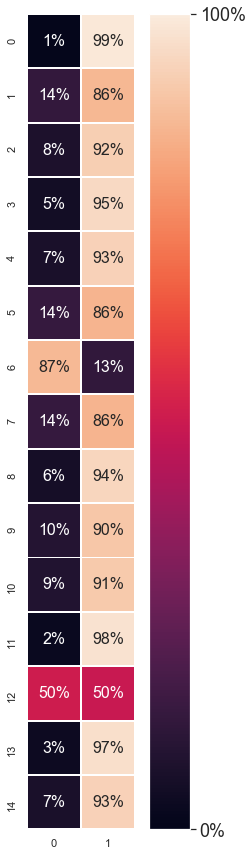

In [33]:
import numpy as np;
import seaborn as sns; sns.set()
import matplotlib

plt.subplots(figsize=(5,15))

matplotlib.rc('xtick', labelsize=30)

matplotlib.rc('ytick', labelsize=18)

uniform_data = my_ANN_proba[0:15]
#uniform_data = my_ANN_proba
ax = sns.heatmap(uniform_data,annot=True, fmt='.0%', cbar=False, vmin=0, annot_kws={"size": 16}, vmax=1,square=1, linewidth=1.)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([0, 1])
cbar.ax.set_yticklabels(['0%','100%'])

In [34]:
y_predict_prob_lr[0:15]

array([[0.38761471, 0.61238529],
       [0.82020947, 0.17979053],
       [0.13739363, 0.86260637],
       [0.88554788, 0.11445212],
       [0.91271815, 0.08728185],
       [0.95824311, 0.04175689],
       [0.05701638, 0.94298362],
       [0.0276943 , 0.9723057 ],
       [0.96809304, 0.03190696],
       [0.4074599 , 0.5925401 ],
       [0.03402638, 0.96597362],
       [0.05302976, 0.94697024],
       [0.02182307, 0.97817693],
       [0.9529298 , 0.0470702 ],
       [0.14300842, 0.85699158]])

In [35]:
lr_probs

array([[9.76677883e-02, 9.02332212e-01],
       [7.98952790e-02, 9.20104721e-01],
       [1.17370217e-01, 8.82629783e-01],
       ...,
       [9.93719076e-01, 6.28092426e-03],
       [1.67967040e-09, 9.99999998e-01],
       [3.04241334e-01, 6.95758666e-01]])

In [36]:
from sklearn import metrics

# fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_probs[:,1], pos_label=1)
# fprs, tprs, thresholds = metrics.roc_curve(y_test, svm_proba[:,1], pos_label=1)
# fprk, tprk, thresholds = metrics.roc_curve(y_test, knn_proba[:,1], pos_label=1)
# fprf, tprf, thresholds = metrics.roc_curve(y_test, rf_probs, pos_label=1)
# fprd, tprd, thresholds = metrics.roc_curve(y_test, my_decisiontree_Proba[:,1], pos_label=1)
# fprn, tprn, thresholds = metrics.roc_curve(y_test, my_ANN_proba[:,1], pos_label=1)

fpr, tpr, thresholds = metrics.roc_curve(y, lr_probs[:,1], pos_label=1)
fprs, tprs, thresholds = metrics.roc_curve(y, svm_proba[:,1], pos_label=1)
fprk, tprk, thresholds = metrics.roc_curve(y, knn_proba[:,1], pos_label=1)
fprf, tprf, thresholds = metrics.roc_curve(y, rf_probs[:,1], pos_label=1)
fprd, tprd, thresholds = metrics.roc_curve(y, my_decisiontree_Proba[:,1], pos_label=1)
fprn, tprn, thresholds = metrics.roc_curve(y, my_ANN_proba[:,1], pos_label=1)



print(fpr)
print(tpr)

[0.         0.         0.         ... 0.99983361 1.         1.        ]
[0.00000000e+00 1.66389351e-04 4.99168053e-04 ... 9.99667221e-01
 9.99833611e-01 1.00000000e+00]


In [37]:
# AUC:
AUCl = metrics.auc(fpr, tpr)
AUCs = metrics.auc(fprs, tprs)
AUCk = metrics.auc(fprk, tprk)
AUCf = metrics.auc(fprf, tprf)
AUCd = metrics.auc(fprd, tprd)
AUCn = metrics.auc(fprn, tprn)

print(AUCl,AUCs,AUCk,AUCf,AUCd,AUCn)


0.9212297446574068 0.880000179955205 0.8985799873200794 0.9388055127200645 0.9259008557562133 0.9275968643497665


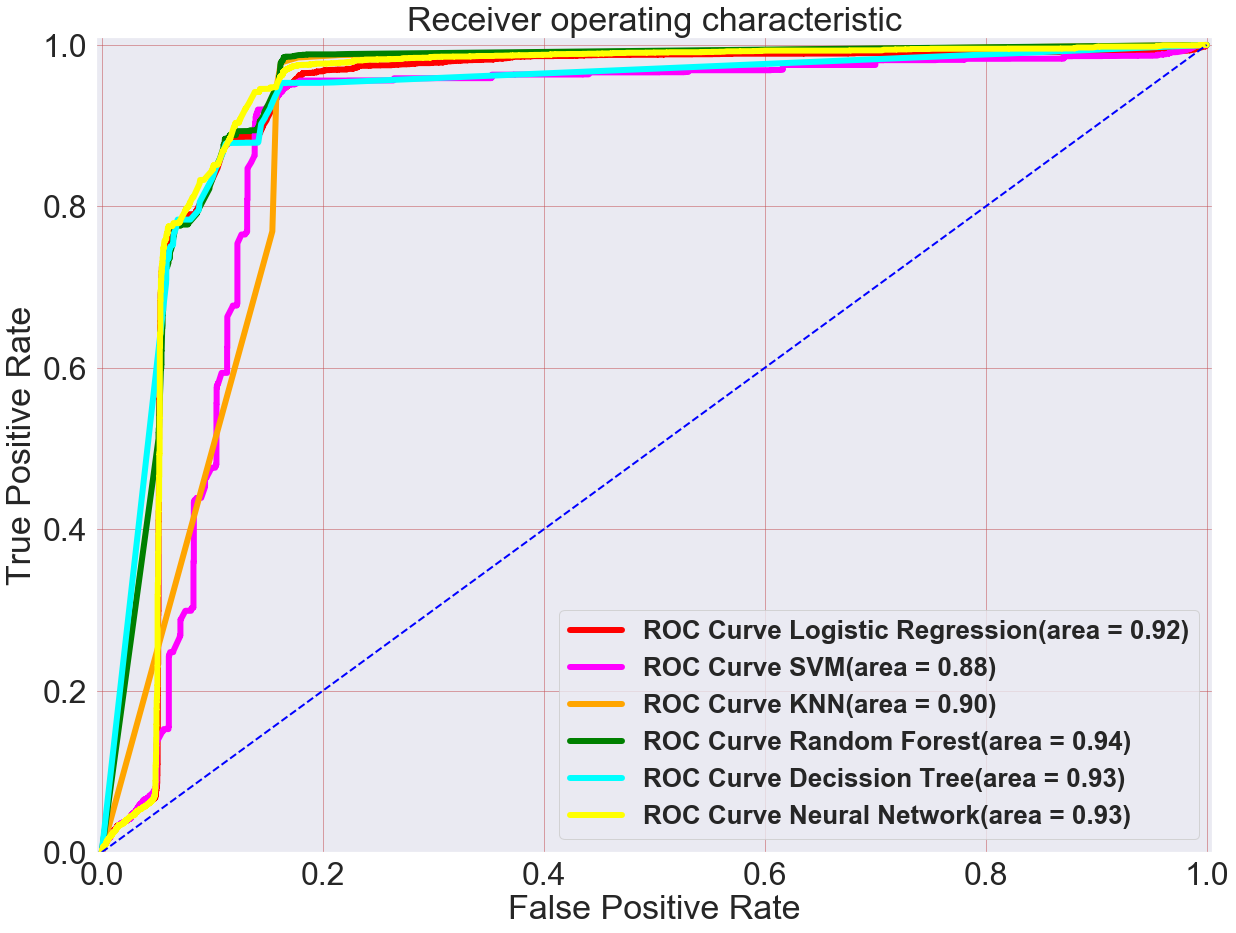

In [38]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:

import matplotlib.pyplot as plt


rc={'axes.labelsize': 34, 'font.size': 34, 'legend.fontsize': 34.0, 'axes.titlesize': 34}
plt.rcParams.update(**rc)

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

fig, ax=plt.subplots(figsize=(20,15))

ax.tick_params(direction='out', length=6, width=2, labelsize=32,
               grid_color='r', grid_alpha=0.5)
# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=6, 
         label='ROC Curve Logistic Regression(area = %0.2f)' % AUCl)

plt.plot(fprs, tprs, color='Magenta', lw=6, 
         label='ROC Curve SVM(area = %0.2f)' % AUCs)

plt.plot(fprk, tprk, color='Orange', lw=6, 
         label='ROC Curve KNN(area = %0.2f)' % AUCk)

plt.plot(fprf, tprf, color='Green', lw=6, 
         label='ROC Curve Random Forest(area = %0.2f)' % AUCf)

plt.plot(fprd, tprd, color='cyan', lw=6, 
         label='ROC Curve Decission Tree(area = %0.2f)' % AUCd)

plt.plot(fprn, tprn, color='yellow', lw=6, 
         label='ROC Curve Neural Network(area = %0.2f)' % AUCn)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right",prop={'size':20},fontsize=32,handlelength=12,handleheight=2)
plt.legend(loc=4, prop={'size': 26,'weight':'bold','style':'normal'})
plt.savefig("AUC Comparison v2",dpi=300)

plt.show()

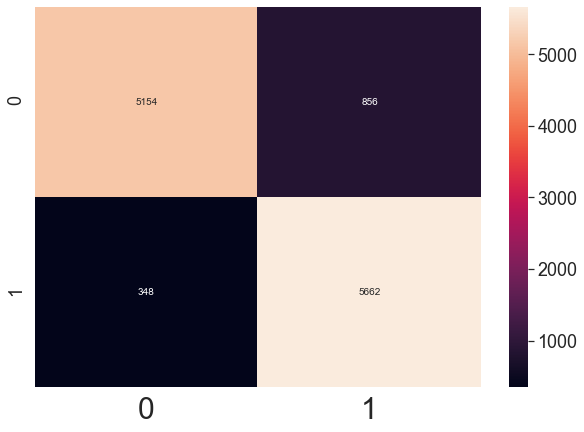

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

#svm_predict = svclassifier.predict(X_test)
my_ANN=my_ANN_proba[:,1]>0.5
cm=metrics.confusion_matrix(y,my_ANN)

plt.figure(figsize = (10,7))
sn.heatmap(cm, fmt='', annot=True)


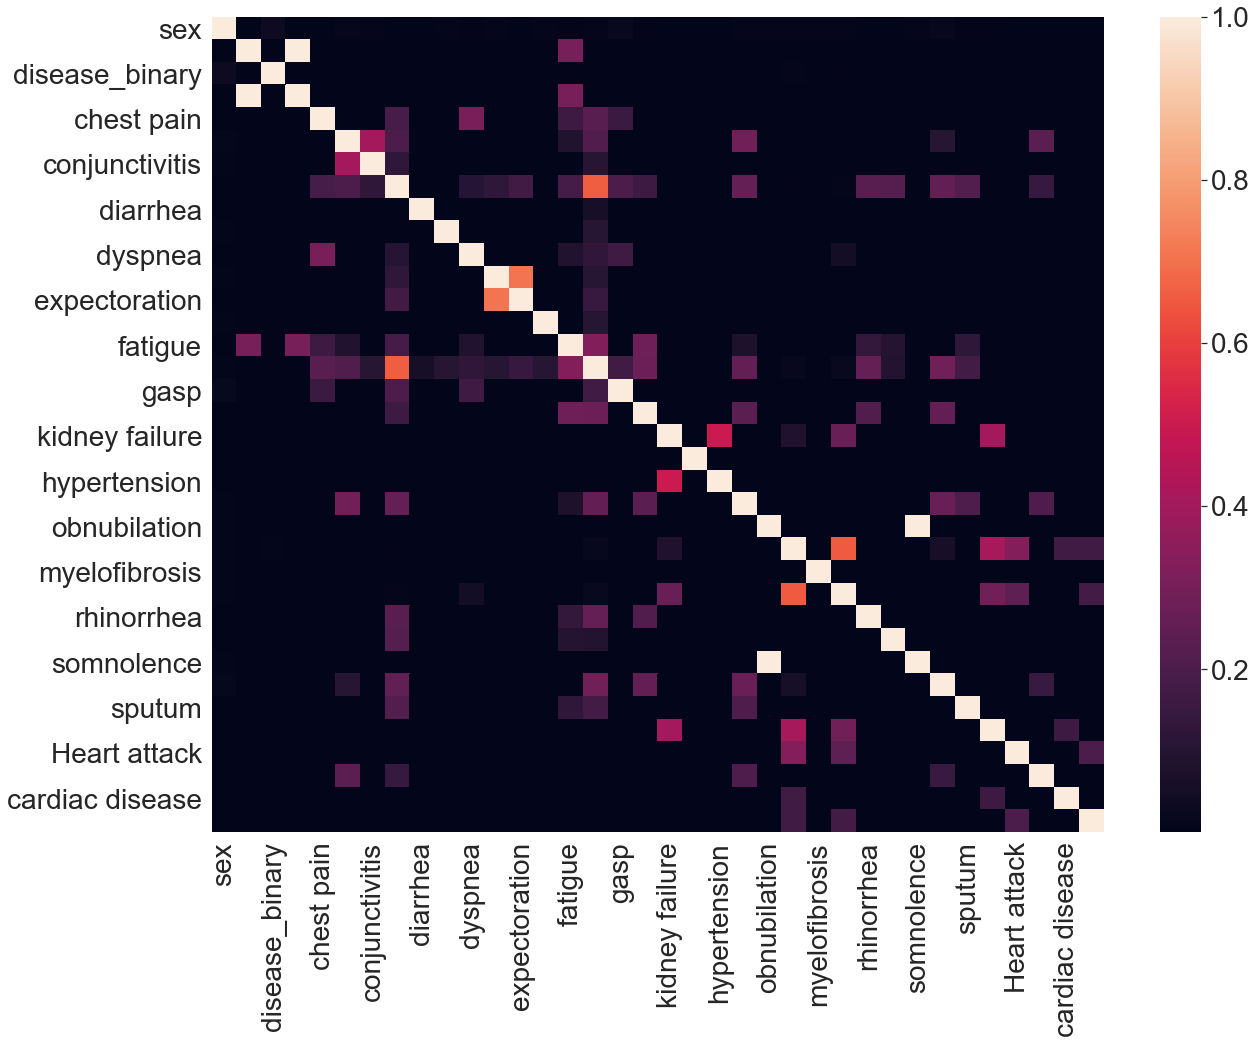

In [43]:

matplotlib.rc('xtick', labelsize=28)

matplotlib.rc('ytick', labelsize=28)

plt.subplots(figsize=(20,15))


num_col=['sex', 'anorexia', 'chronic_disease_binary', 'anorexia', 'chest pain',
       'chills', 'conjunctivitis', 'cough', 'diarrhea', 'dizziness', 'dyspnea',
       'emesis', 'expectoration', 'eye irritation', 'fatigue', 'fever', 'gasp',
       'headache', 'kidney failure', 'lesions on chest radiographs',
       'hypertension', 'Myalgia', 'obnubilation', 'pneumonia', 'myelofibrosis',
       'respiratory distress', 'rhinorrhea', 'shortness of breath',
       'somnolence', 'sore throat', 'sputum', 'septic shock', 'Heart attack',
       'cold', 'cardiac disease', 'hypoxia']

dfp = df[num_col]
dfp=dfp.rename(columns={'chronic_disease_binary':'disease_binary'})

corrMatrix = dfp.corr()
corrMatrix=abs(corrMatrix)
sn.heatmap(corrMatrix)
plt.savefig("Feature Correlation HeatMap feat1 v2",dpi=300)


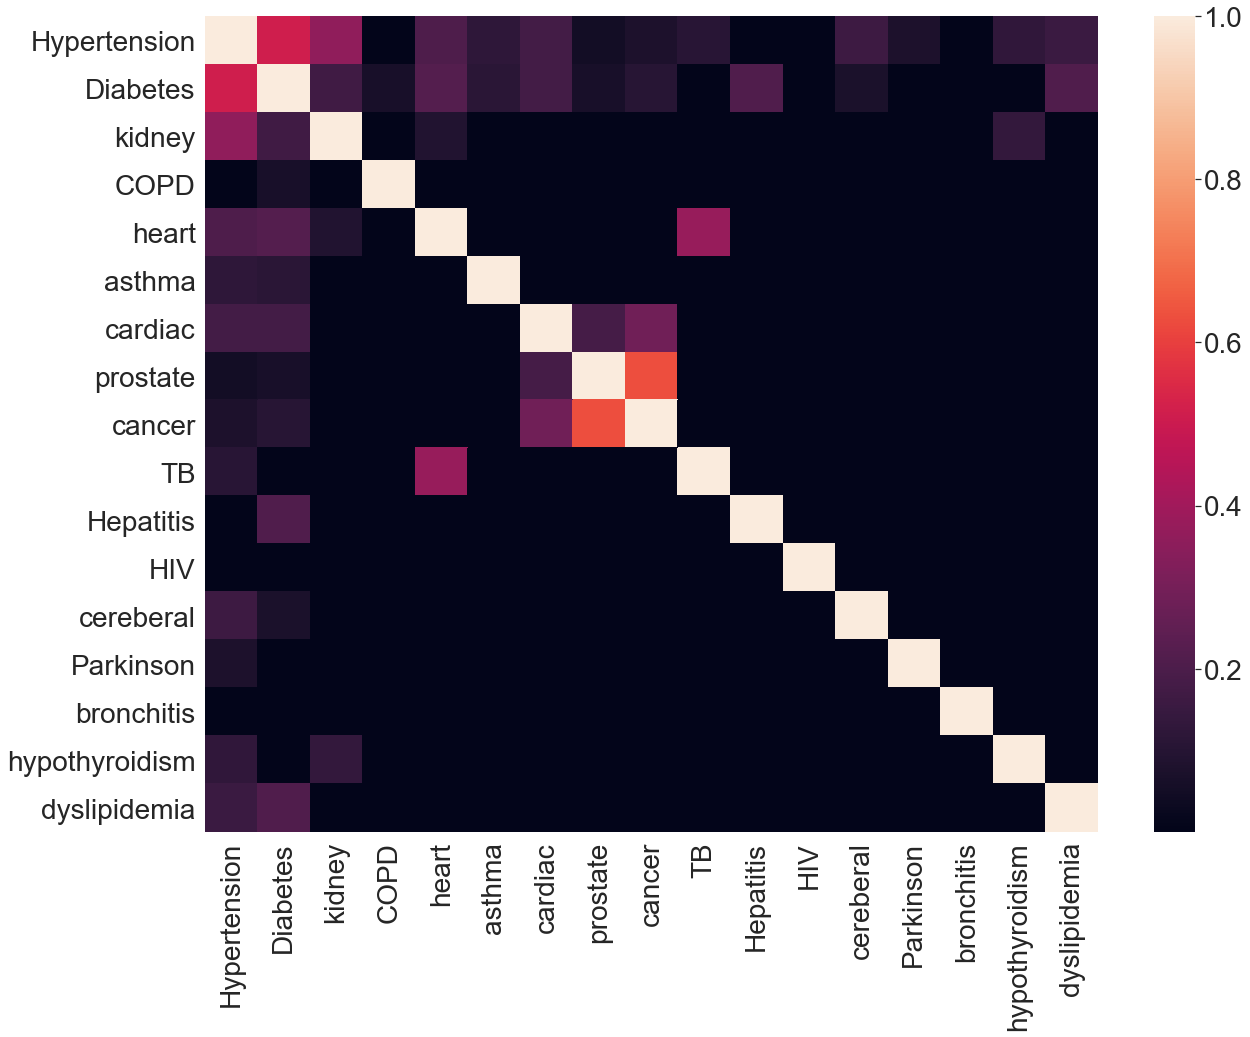

In [44]:
matplotlib.rc('xtick', labelsize=28)

matplotlib.rc('ytick', labelsize=28)

plt.subplots(figsize=(20,15))

num_col=['chronic_disease_Hypertension', 
       'chronic_disease_Diabetes','chronic_disease_kidney', 'chronic_disease_COPD',
       'chronic_disease_heart', 'chronic_disease_asthma','chronic_disease_cardiac', 
       'chronic_disease_prostate','chronic_disease_cancer', 'chronic_disease_TB',
       'chronic_disease_Hepatitis', 'chronic_disease_HIV','chronic_disease_cereberal', 
       'chronic_disease_Parkinson','chronic_disease_bronchitis', 'chronic_disease_hypothyroidism',
       'chronic_disease_dyslipidemia']

dfp = df[num_col]

dfp=dfp.rename(columns={
'chronic_disease_Hypertension' :'Hypertension',
'chronic_disease_Diabetes' :'Diabetes',
'chronic_disease_kidney' :'kidney',
'chronic_disease_COPD' :'COPD',
'chronic_disease_heart' :'heart',
'chronic_disease_asthma' :'asthma',
'chronic_disease_cardiac' :'cardiac',
'chronic_disease_prostate' :'prostate',
'chronic_disease_cancer' :'cancer',
'chronic_disease_TB' :'TB',
'chronic_disease_Hepatitis' :'Hepatitis',
'chronic_disease_HIV' :'HIV',
'chronic_disease_cereberal' :'cereberal',
'chronic_disease_Parkinson' :'Parkinson',
'chronic_disease_bronchitis' :'bronchitis',
'chronic_disease_hypothyroidism' :'hypothyroidism',
'chronic_disease_dyslipidemia' :'dyslipidemia'
})

corrMatrix = dfp.corr()
corrMatrix=abs(corrMatrix)
sn.heatmap(corrMatrix)
plt.savefig("Feature Correlation HeatMap Chronic disease v2",dpi=300)


In [631]:
my_ANN = MLPClassifier(activation= 'logistic', alpha= 0.04, hidden_layer_sizes= (10), learning_rate='constant', random_state= 9, solver= 'adam',max_iter=3000,)
my_ANN.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.04, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=9, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)